In [14]:
import pandas as pd
import nltk
import spacy
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the CSV file - replace with your actual file path
csv_file = r"C:\Users\User\Downloads\Untitled form (Responses) - Form Responses 1.csv"
df = pd.read_csv(csv_file)

# Combine all comments into a single string
# Modify 'Comments' to match the column name in your CSV file if different
text_data = ' '.join(df['Comments'].astype(str).tolist())

# Step 1: Eliminate stop words and get word counts
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower())  # Tokenize and lowercase
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Count the top 10 words
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)

# Print the top 10 words with their counts
print("Top 10 words:")
for word, count in top_10_words:
    print(f"{word}: {count}")


Top 10 words:
like: 26
show: 26
watch: 19
podcast: 17
informative: 16
interesting: 14
podcasts: 13
love: 12
topics: 9
know: 9


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Named Entities:
Motivation - ORG
J Sai Deepak - PERSON
KK Mohammed - PERSON
Informative - NORP
creepy - NORP
daily - DATE
ECG - ORG
Medicine Selection - PERSON
Time - ORG
Indian - NORP
Hinduism - NORP
Bollywood - ORG
Nepal - GPE
80% - PERCENT
Hindu - NORP
Indian History - PERSON
Sanatana Dharma - PERSON
Jaya Kishori - PERSON
Hinduism - NORP
Hmm - PERSON
Ranveer - PERSON
Ranveer - PERSON
Nooooooo - ORG
YouTube - PRODUCT
16 - CARDINAL
TRS - ORG
Majorly - PERSON
Ranveer - PERSON
Love - WORK_OF_ART
Love - WORK_OF_ART
Ranveer - LOC
Love - WORK_OF_ART
Informative - NORP
2016  Inspire - DATE


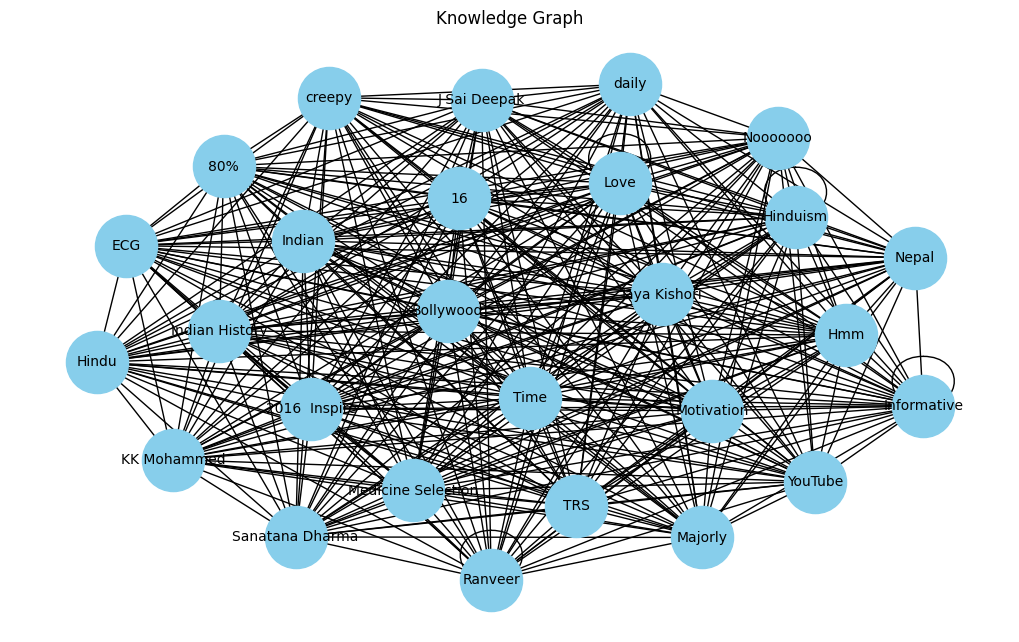

In [18]:
# Step 2: Named Entity Recognition (NER)
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_data)

print("\nNamed Entities:")
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

# Step 3: Derive Knowledge Graph
edges = []
for ent1 in doc.ents:
    for ent2 in doc.ents:
        # Add edges only between unique entity pairs
        if ent1 != ent2:
            edges.append((ent1.text, ent2.text))

# Create a graph from the edges
import networkx as nx
graph = nx.Graph()
graph.add_edges_from(edges)

# Step 4: Draw the knowledge graph
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=2000, 
        font_size=10, font_color='black')
plt.title('Knowledge Graph')
plt.show()


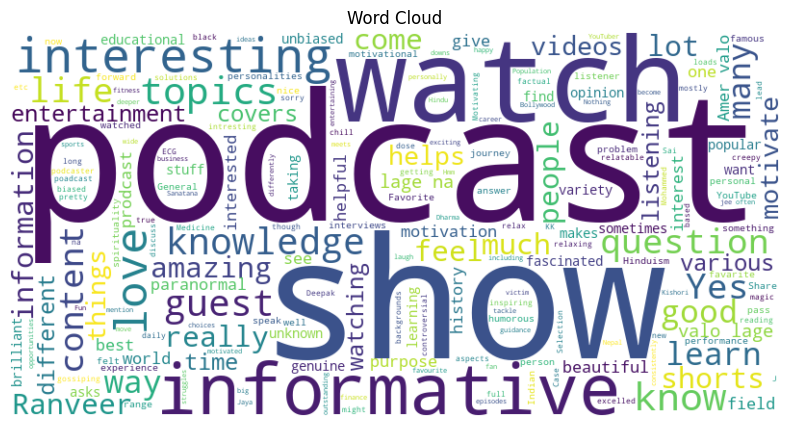

In [19]:
from wordcloud import WordCloud 
# Generate a word cloud 
wordcloud = WordCloud(width=800, height=400, 
background_color='white').generate(text_data) 
# Display the word cloud 
plt.figure(figsize=(10, 5)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Word Cloud') 
plt.show()

In [21]:
from nltk import ngrams
import collections

# Generate bigrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)

# Get the top 10 bigrams
top_10_bigrams = bigram_counts.most_common(10)

# Print the top 10 bigrams with their counts
print("\nTop 10 Bigrams:")
for bigram, count in top_10_bigrams:
    print(f"{' '.join(bigram)}: {count}")
 


Top 10 Bigrams:
valo lage: 4
lage na: 4
amer valo: 3
like show: 3
informative interesting: 3
watch show: 3
like way: 3
love prodcast: 3
prodcast love: 3
love listening: 3


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Initialize the TF-IDF Vectorizer with English stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the 'Comments' column in the DataFrame
tfidf_matrix = vectorizer.fit_transform(df['Comments'].astype(str))

# Convert the TF-IDF matrix to a DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print("\nTF-IDF Matrix:")
print(tfidf_df.head())



TF-IDF Matrix:
    16  2016   80  amazing  amer  answer  answers  asked  asking  asks  ...  \
0  0.0   0.0  0.0      0.0   0.0     0.0      0.0    0.0     0.0   0.0  ...   
1  0.0   0.0  0.0      0.0   0.0     0.0      0.0    0.0     0.0   0.0  ...   
2  0.0   0.0  0.0      0.0   0.0     0.0      0.0    0.0     0.0   0.0  ...   
3  0.0   0.0  0.0      0.0   0.0     0.0      0.0    0.0     0.0   0.0  ...   
4  0.0   0.0  0.0      0.0   0.0     0.0      0.0    0.0     0.0   0.0  ...   

   watching  way  ways  wide  winged  wish  world  yes  youtube  youtuber  
0       0.0  0.0   0.0   0.0     0.0   0.0    0.0  0.0      0.0       0.0  
1       0.0  0.0   0.0   0.0     0.0   0.0    0.0  0.0      0.0       0.0  
2       0.0  0.0   0.0   0.0     0.0   0.0    0.0  0.0      0.0       0.0  
3       0.0  0.0   0.0   0.0     0.0   0.0    0.0  0.0      0.0       0.0  
4       0.0  0.0   0.0   0.0     0.0   0.0    0.0  0.0      0.0       0.0  

[5 rows x 314 columns]
